### **Loading the data and libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [3]:
sixcrypto = pd.read_csv(r"C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv") 
df=pd.DataFrame(sixcrypto)

### **EDA Analysis**

In [3]:
df.head(5)

SNo      Name Symbol     Date     High      Low     Open    Close  \
0    1  Litecoin    LTC  1/01/17  4.52153  4.32871  4.32912  4.51159   
1    2  Litecoin    LTC  1/02/17  4.73766  4.48466  4.52045  4.64894   
2    3  Litecoin    LTC  1/03/17  4.73184  4.56487  4.65588  4.62620   
3    4  Litecoin    LTC  1/04/17  4.83785  4.63375  4.63375  4.83785   
4    5  Litecoin    LTC  1/05/17  4.94586  4.22687  4.91437  4.29272   

       Volume    Marketcap  
0  11337500.0  221718274.9  
1  14595300.0  228536447.6  
2  10055700.0  227483920.9  
3  13762400.0  237966484.3  
4  19196000.0  211212252.1

In [20]:
df.tail(5)

SNo     Name Symbol     Date         High          Low         Open  \
9403  9404  Bitcoin    BTC  7/02/21  33939.58870  32770.68078  33549.60018   
9404  9405  Bitcoin    BTC  7/03/21  34909.25990  33402.69654  33854.42136   
9405  9406  Bitcoin    BTC  7/04/21  35937.56715  34396.47746  34665.56487   
9406  9407  Bitcoin    BTC  7/05/21  35284.34443  33213.66103  35284.34443   
9407  9408  Bitcoin    BTC  7/06/21  35038.53636  33599.91617  33723.50966   

            Close        Volume     Marketcap  
9403  33897.04859  3.872897e+10  6.350000e+11  
9404  34668.54840  2.438396e+10  6.500000e+11  
9405  35287.77977  2.492431e+10  6.620000e+11  
9406  33746.00246  2.672155e+10  6.330000e+11  
9407  34235.19345  2.650126e+10  6.420000e+11

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        9408 non-null   int64  
 1   Name       9408 non-null   object 
 2   Symbol     9408 non-null   object 
 3   Date       9408 non-null   object 
 4   High       9408 non-null   float64
 5   Low        9408 non-null   float64
 6   Open       9408 non-null   float64
 7   Close      9408 non-null   float64
 8   Volume     9408 non-null   float64
 9   Marketcap  9408 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 735.1+ KB


In [22]:
df['Name'].value_counts()

Litecoin        1648
Dogecoin        1648
Ethereum        1648
Bitcoin         1648
Binance Coin    1442
Cardano         1374
Name: Name, dtype: int64

In [24]:
df.describe().transpose()

count          mean           std           min           25%  \
SNo        9408.0  4.704500e+03  2.716000e+03  1.000000e+00  2.352750e+03   
High       9408.0  2.245296e+03  7.297368e+03  2.048400e-04  1.060599e-01   
Low        9408.0  2.108906e+03  6.823157e+03  1.946130e-04  9.701510e-02   
Open       9408.0  2.180658e+03  7.078639e+03  1.966920e-04  1.011220e-01   
Close      9408.0  2.184401e+03  7.085992e+03  1.967090e-04  1.013561e-01   
Volume     9408.0  5.842552e+09  1.265555e+10  9.284190e+03  8.131160e+07   
Marketcap  9408.0  5.086161e+10  1.334378e+11  9.986680e+06  1.184531e+09   

                    50%           75%           max  
SNo        4.704500e+03  7.056250e+03  9.408000e+03  
High       4.338992e+01  3.497877e+02  6.486310e+04  
Low        4.100250e+01  3.198715e+02  6.220896e+04  
Open       4.234630e+01  3.378597e+02  6.352375e+04  
Close      4.238147e+01  3.379402e+02  6.350346e+04  
Volume     5.721684e+08  5.068277e+09  3.510000e+11  
Marketcap  4.387144e+09  3.859717e+10  1.190000e+12

In [25]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [26]:
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [27]:
print("------  Data Types  ----- \n",df.dtypes)

------  Data Types  ----- 
 SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object


In [28]:
df.duplicated().value_counts()

False    9408
dtype: int64

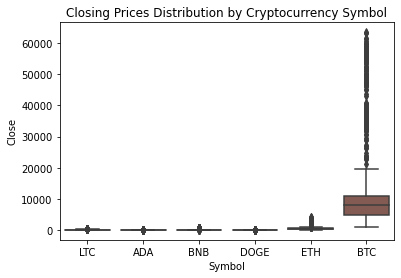

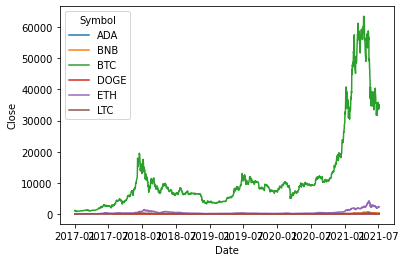

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationship between categorical and numerical features using boxplots
sns.boxplot(x='Symbol', y='Close', data=df)
plt.title('Closing Prices Distribution by Cryptocurrency Symbol')
plt.show()

# Create a new dataframe with just the necessary columns for time series analysis
df_time_series = df[['Date', 'Close', 'Symbol']].copy()

# Convert the 'Date' column to datetime format and set it as the index of the dataframe
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series = df_time_series.set_index('Date')

# Resample the data to a daily frequency and interpolate missing values using linear interpolation
df_time_series = df_time_series.groupby('Symbol').resample('D').interpolate()

# Visualize the time series data using line plots
sns.lineplot(data=df_time_series, x='Date', y='Close', hue='Symbol')
plt.show()

### **Univariate Analysis**


  Symbol  Skewness
0    BTC  2.318963
1    ETH  2.672445
2    LTC  1.608763
3   DOGE  4.826529
4    ADA  2.389419
5    BNB  3.343639


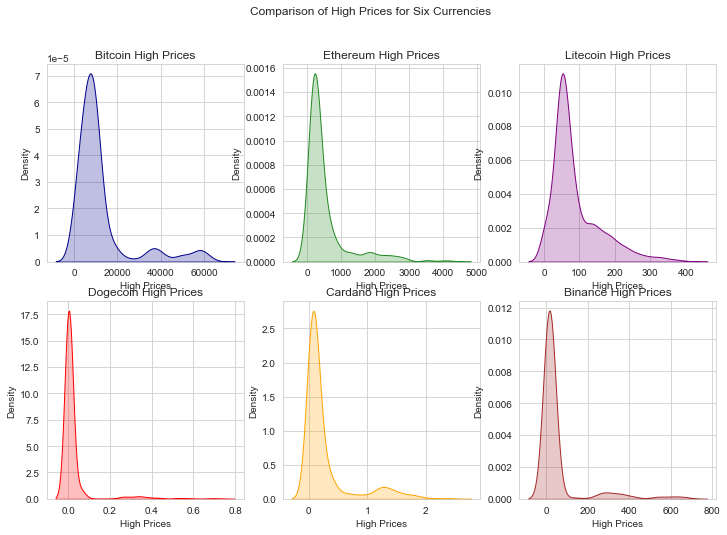

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Extract the "High" data for each currency
bitcoin_high = df[df["Symbol"] == "BTC"]["High"]
ethereum_high = df[df["Symbol"] == "ETH"]["High"]
litecoin_high = df[df["Symbol"] == "LTC"]["High"]
dogecoin_high = df[df["Symbol"] == "DOGE"]["High"]
cardano_high = df[df["Symbol"] == "ADA"]["High"]
binance_high = df[df["Symbol"] == "BNB"]["High"]

# Calculate the skewness for each currency's "High" data
skewness = pd.DataFrame({'Symbol': ['BTC', 'ETH', 'LTC', 'DOGE', 'ADA', 'BNB'],
                         'Skewness': [bitcoin_high.skew(), ethereum_high.skew(), litecoin_high.skew(),
                                      dogecoin_high.skew(), cardano_high.skew(), binance_high.skew()]})

# Create a 2x3 grid of density plots of the "High" data for each currency
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.kdeplot(bitcoin_high, shade=True, ax=axes[0, 0], color='darkblue')
sns.kdeplot(ethereum_high, shade=True, ax=axes[0, 1], color='forestgreen')
sns.kdeplot(litecoin_high, shade=True, ax=axes[0, 2], color='purple')
sns.kdeplot(dogecoin_high, shade=True, ax=axes[1, 0], color='red')
sns.kdeplot(cardano_high, shade=True, ax=axes[1, 1], color='orange')
sns.kdeplot(binance_high, shade=True, ax=axes[1, 2], color='brown')

# Add title and axis labels to each plot
axes[0, 0].set(title="Bitcoin High Prices", xlabel="High Prices", ylabel="Density")
axes[0, 1].set(title="Ethereum High Prices", xlabel="High Prices", ylabel="Density")
axes[0, 2].set(title="Litecoin High Prices", xlabel="High Prices", ylabel="Density")
axes[1, 0].set(title="Dogecoin High Prices", xlabel="High Prices", ylabel="Density")
axes[1, 1].set(title="Cardano High Prices", xlabel="High Prices", ylabel="Density")
axes[1, 2].set(title="Binance High Prices", xlabel="High Prices", ylabel="Density")

# Add a main title to the plot
plt.suptitle("Comparison of High Prices for Six Currencies")

# Display the skewness for each currency's "High" data
print(skewness)

# Show the plot
plt.show()


  Symbol  Skewness
0    BTC  2.331511
1    ETH  2.642688
2    LTC  1.560778
3   DOGE  4.701561
4    ADA  2.378311
5    BNB  3.359945


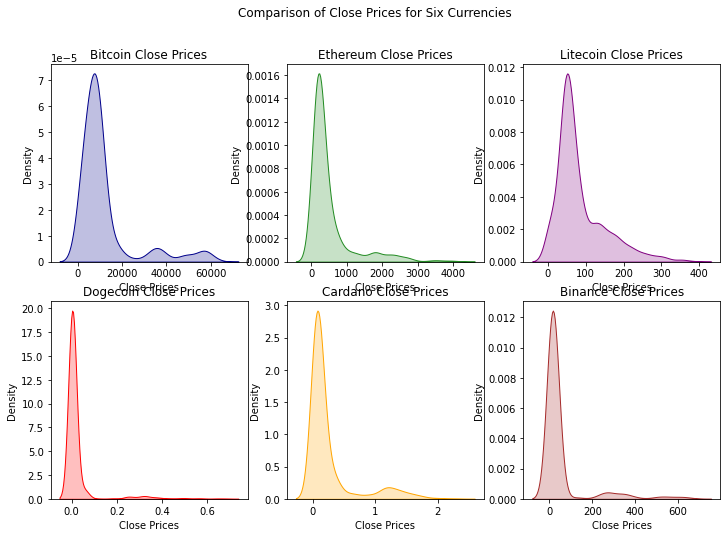

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Extract the "Close" data for each currency
bitcoin_Close = df[df["Symbol"] == "BTC"]["Close"]
ethereum_Close = df[df["Symbol"] == "ETH"]["Close"]
litecoin_Close = df[df["Symbol"] == "LTC"]["Close"]
dogecoin_Close = df[df["Symbol"] == "DOGE"]["Close"]
cardano_Close = df[df["Symbol"] == "ADA"]["Close"]
binance_Close = df[df["Symbol"] == "BNB"]["Close"]

# Calculate the skewness for each currency's "High" data
skewness = pd.DataFrame({'Symbol': ['BTC', 'ETH', 'LTC', 'DOGE', 'ADA', 'BNB'],
                         'Skewness': [bitcoin_Close.skew(), ethereum_Close.skew(), litecoin_Close.skew(),
                                      dogecoin_Close.skew(), cardano_Close.skew(), binance_Close.skew()]})

# Create a 2x3 grid of density plots of the "Close" data for each currency
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.kdeplot(bitcoin_Close, shade=True, ax=axes[0, 0], color='darkblue')
sns.kdeplot(ethereum_Close, shade=True, ax=axes[0, 1], color='forestgreen')
sns.kdeplot(litecoin_Close, shade=True, ax=axes[0, 2], color='purple')
sns.kdeplot(dogecoin_Close, shade=True, ax=axes[1, 0], color='red')
sns.kdeplot(cardano_Close, shade=True, ax=axes[1, 1], color='orange')
sns.kdeplot(binance_Close, shade=True, ax=axes[1, 2], color='brown')

# Add title and axis labels to each plot
axes[0, 0].set(title="Bitcoin Close Prices", xlabel="Close Prices", ylabel="Density")
axes[0, 1].set(title="Ethereum Close Prices", xlabel="Close Prices", ylabel="Density")
axes[0, 2].set(title="Litecoin Close Prices", xlabel="Close Prices", ylabel="Density")
axes[1, 0].set(title="Dogecoin Close Prices", xlabel="Close Prices", ylabel="Density")
axes[1, 1].set(title="Cardano Close Prices", xlabel="Close Prices", ylabel="Density")
axes[1, 2].set(title="Binance Close Prices", xlabel="Close Prices", ylabel="Density")

# Add a main title to the plot
plt.suptitle("Comparison of Close Prices for Six Currencies")

# Display the skewness for each currency's "Close" data
print(skewness)

# Show the plot
plt.show()

### **Bivariate Analysis**


<Figure size 1080x720 with 0 Axes>

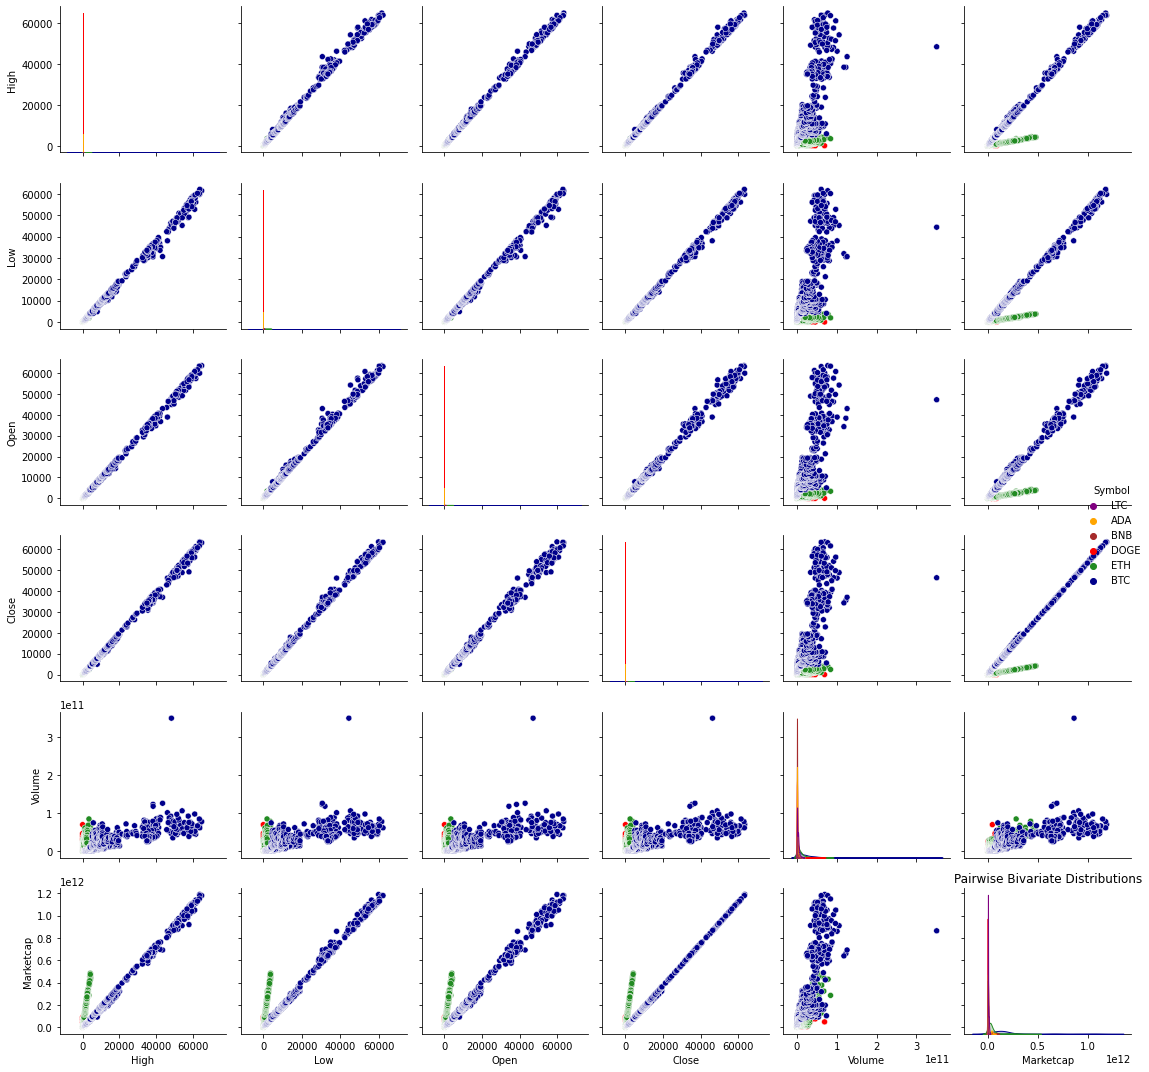

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('sixcrypto.csv')

# Create a copy of the dataframe without 'SNo' column
df_without_sno = df.drop('SNo', axis=1)

# Perform the bivariate analysis on the copy
plt.figure(figsize=(15,10))
sns.pairplot(df_without_sno, hue="Symbol", palette={"BTC": "darkblue", "ETH": "forestgreen", "LTC": "purple", "DOGE": "red", "ADA": "orange", "BNB": "brown"})
plt.title("Pairwise Bivariate Distributions")
plt.tight_layout()
plt.show()

### **Panda's Profiling**

In [4]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(pd.read_csv(r'C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv'))
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# profile.to_widgets()

In [31]:
# profile.to_file("CryptoAnalysis.html")

### **Correlation**

In [4]:
# load the dataset
df = pd.read_csv("sixcrypto.csv")

# select only the numerical columns
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
num_df = df[num_cols]

# calculate the correlation matrix
corr_matrix = num_df.corr()

print(corr_matrix)

               Open      High       Low     Close    Volume  Marketcap
Open       1.000000  0.999546  0.999109  0.998901  0.749004   0.968995
High       0.999546  1.000000  0.999053  0.999525  0.750852   0.969801
Low        0.999109  0.999053  1.000000  0.999423  0.744467   0.969238
Close      0.998901  0.999525  0.999423  1.000000  0.748179   0.970084
Volume     0.749004  0.750852  0.744467  0.748179  1.000000   0.807050
Marketcap  0.968995  0.969801  0.969238  0.970084  0.807050   1.000000


### **Correlation HeatMap**

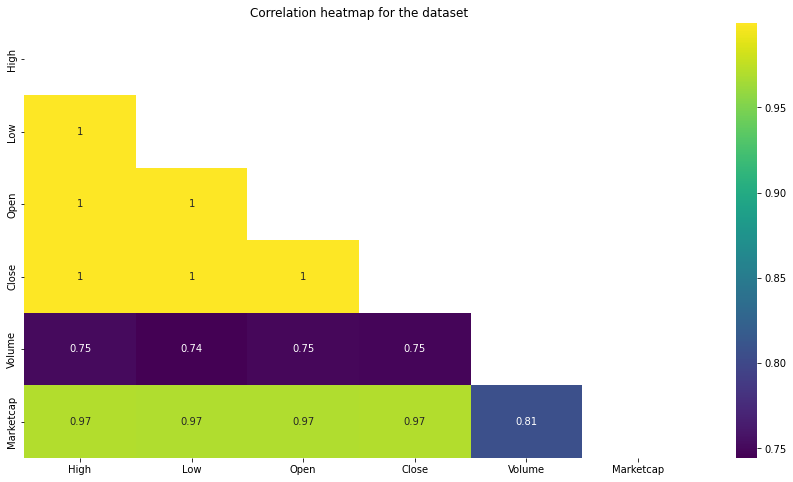

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas dataframe
df = pd.read_csv('sixcrypto.csv')

# Create a copy of the dataframe without 'SNo' column
df_without_sno = df.drop('SNo', axis=1)

# Correlation heatmap
plt.figure(figsize=(15,8))
corr = df_without_sno.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.title("Correlation heatmap for the dataset")
plt.show()

<AxesSubplot:>

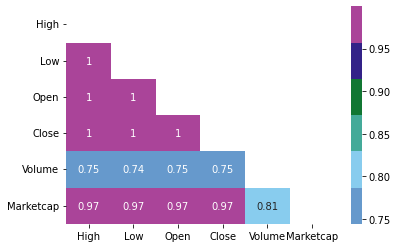

In [24]:
custom_palette = sns.color_palette(["#6699cc", "#88ccee", "#44aa99", "#117733", "#332288", "#aa4499"])
sns.heatmap(corr, annot=True, mask=mask, cmap=custom_palette)

### **Principal Component Analysis (PCA)**

Original features model metrics:
Mean Squared Error: 1.6000283876990543e-18
Mean Absolute Error: 7.095594159650725e-10
Mean Absolute Percentage Error: 3.481475077404357e-06
R-squared: 1.0
Adjusted R-squared: 1.0

PCA model metrics:
Mean Squared Error: 1.8874954732062497e-18
Mean Absolute Error: 7.861515458933928e-10
Mean Absolute Percentage Error: 4.116410075943867e-06
R-squared: 1.0
Adjusted R-squared: 1.0



Feature importances for the original features model:
Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 1.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000


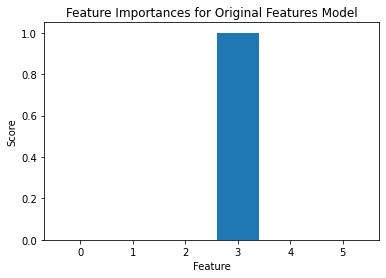


Feature importances for the PCA model:
Principal Component: 1, Score: 0.00006
Principal Component: 2, Score: -0.00003


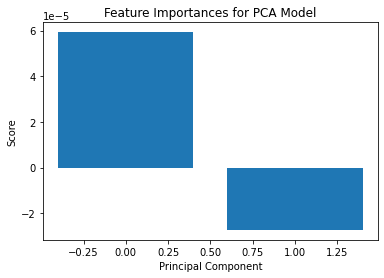

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Select the features to use
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
x = df.loc[:, features].values
y = df['Close'].values

# Scale the data using MinMaxScaler()
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Concatenate the principal components dataframe with the original dataframe
df_pca = pd.concat([pca_df, df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the original features
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Compute the metrics for the original features model
print("Original features model metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# Standardize the data
x_std = StandardScaler().fit_transform(x)

# Perform PCA on the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_std)

# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Concatenate the principal components dataframe with the original dataframe
x_pca = np.hstack((pca_df.values, x))
X_pca_train, X_pca_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the principal components
lr_pca = LinearRegression()
lr_pca.fit(X_pca_train, y_train)
y_pred_pca = lr_pca.predict(X_pca_test)

# Compute the metrics for the PCA model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\nPCA model metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_pca))
print("Mean Absolute Percentage Error:", np.mean(np.abs((y_test - y_pred_pca) / y_test)) * 100)
print("R-squared:", r2_score(y_test, y_pred_pca))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred_pca))*(len(y_test)-1)/(len(y_test)-X_pca_test.shape[1]-1))

# Visualize the results
import plotly.express as px

fig = px.scatter(df_pca, x='PC1', y='PC2', color='Close', title='Cryptocurrency Prices with PCA')
fig.show()

# Visualize the feature importances for the original features model
importance = lr.coef_
print("\nFeature importances for the original features model:")
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Importances for Original Features Model')
plt.show()

# Visualize the feature importances for the PCA model
importance_pca = lr_pca.coef_[:2]
print("\nFeature importances for the PCA model:")
for i,v in enumerate(importance_pca):
    print('Principal Component: %0d, Score: %.5f' % (i+1,v))
plt.bar([x for x in range(len(importance_pca))], importance_pca)
plt.xlabel('Principal Component')
plt.ylabel('Score')
plt.title('Feature Importances for PCA Model')
plt.show()

### **Data Visualization**

In [36]:
import plotly.express as px
import pandas as pd

# load data
df = pd.read_csv('sixcrypto.csv')

# filter data for six cryptocurrencies and six years
crypto_list = ['Bitcoin', 'Ethereum', 'Dogecoin', 'Litecoin', 'Binance Coin', 'Cardano']
df = df[df['Name'].isin(crypto_list) & (df['Date'] >= '2017-01-01')]

# convert date to year
df['Year'] = pd.DatetimeIndex(df['Date']).year

# group data by cryptocurrency and year
grouped_df = df.groupby(['Name', 'Year'])['Marketcap'].sum().reset_index()

# plot data
fig = px.line(grouped_df, x='Year', y='Marketcap', color='Name', line_group='Name',
              title='Cryptocurrency Market Cap (Million USD) by Year')
fig.update_layout(legend_title='Cryptocurrency')
fig.show()

In [37]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('sixcrypto.csv')

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the price difference between closing and opening prices
df['Price_Differnce'] = df['Close'] - df['Open']

# Set the background color
fig.update_layout(plot_bgcolor='rgb(240, 240, 240)')

# Plot the data
fig = px.line(df, x='Date', y='Price_Differnce', color='Name', title='Historical difference between closing and opening price of Crypto since 2017')

fig.show()

In [38]:
# Load the data
df = pd.read_csv('sixcrypto.csv')

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily price spread
df['Daily_Price_Spread'] = df['High'] - df['Low']

# Plot the data
fig = px.line(df, x='Date', y='Daily_Price_Spread', color='Name', title='Historical difference between High and low prices for each day by currency')

fig.show()

### **Seasonal decomposition on the Close price time series of each cryptocurrency**

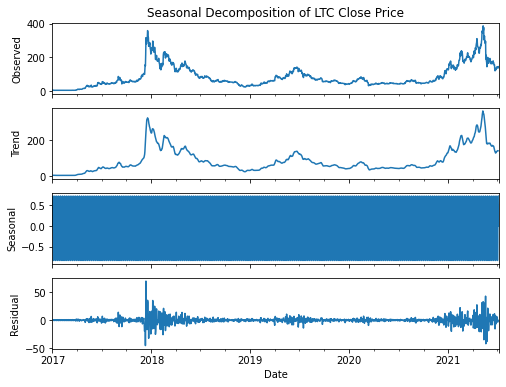

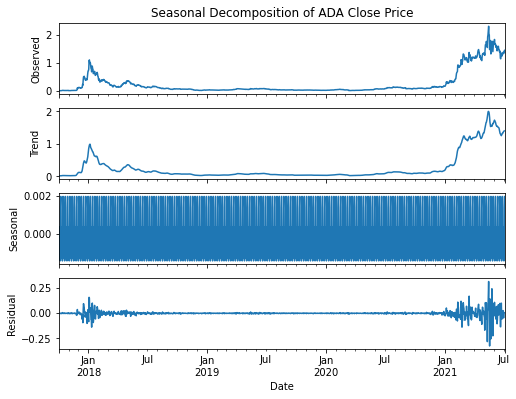

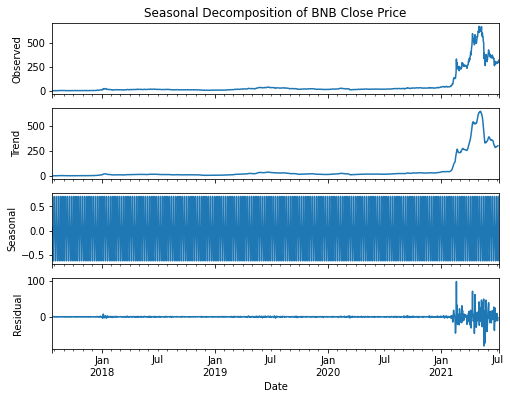

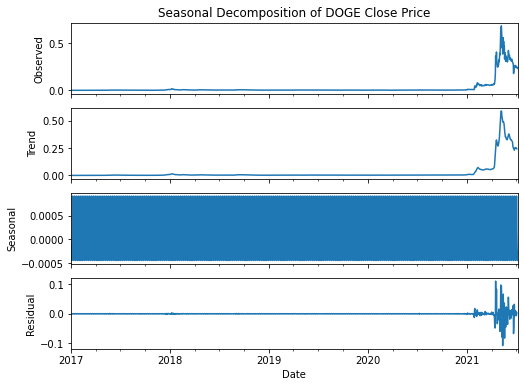

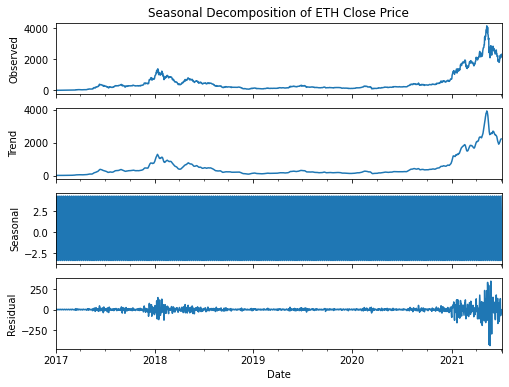

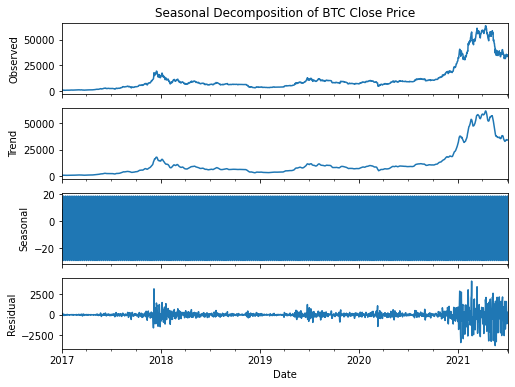

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data into a pandas dataframe
df = pd.read_csv('sixcrypto.csv')

# Create a new dataframe with just the necessary columns for time series analysis
df_time_series = df[['Date', 'Close', 'Symbol']].copy()

# Convert the 'Date' column to datetime format and set it as the index of the dataframe
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series = df_time_series.set_index('Date')

# Resample the data to a daily frequency and interpolate missing values using linear interpolation
df_time_series = df_time_series.groupby('Symbol').resample('D').interpolate()

# Perform seasonal decomposition
for symbol in df['Symbol'].unique():
    res = sm.tsa.seasonal_decompose(df_time_series.loc[symbol]['Close'], model='additive')
    fig, axs = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
    axs[0].set_title(f'Seasonal Decomposition of {symbol} Close Price')
    res.observed.plot(ax=axs[0], legend=False)
    axs[0].set_ylabel('Observed')
    res.trend.plot(ax=axs[1], legend=False)
    axs[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axs[2], legend=False)
    axs[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axs[3], legend=False)
    axs[3].set_ylabel('Residual')
    plt.show()

### **The Augmented Dickey-Fuller (ADF) test**

In [42]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the data into a pandas dataframe
df = pd.read_csv('sixcrypto.csv')

# Drop the 'SNo' column since it is not useful for EDA
df = df.drop('SNo', axis=1)

# Create a new dataframe with just the necessary columns for time series analysis
df_time_series = df[['Date', 'Close', 'Symbol']].copy()

# Convert the 'Date' column to datetime format and set it as the index of the dataframe
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series = df_time_series.set_index('Date')

# Resample the data to a daily frequency and interpolate missing values using linear interpolation
df_time_series = df_time_series.groupby('Symbol').resample('D').interpolate()

# Iterate through each cryptocurrency and perform the ADF test
for symbol in df['Symbol'].unique():
    # Get the time series data for the current cryptocurrency
    ts_data = df_time_series.loc[df_time_series['Symbol'] == symbol, 'Close']
    
    # Perform the ADF test and print the results
    result = adfuller(ts_data)
    print(f'ADF test results for {symbol}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('\n')

ADF test results for LTC:
ADF Statistic: -2.7082134836981204
p-value: 0.0726277298789853
Critical Values:
   1%: -3.4343880265995215
   5%: -2.8633235546096194
   10%: -2.56771952639493


ADF test results for ADA:
ADF Statistic: -0.36685973652723514
p-value: 0.9154867070335785
Critical Values:
   1%: -3.4352067731212785
   5%: -2.863684892975246
   10%: -2.5679119438718847


ADF test results for BNB:
ADF Statistic: -1.1927352624028085
p-value: 0.6767129850848179
Critical Values:
   1%: -3.434973278556316
   5%: -2.8635818545830376
   10%: -2.567857072940785


ADF test results for DOGE:
ADF Statistic: -2.5046236471718837
p-value: 0.11435339083070933
Critical Values:
   1%: -3.4343880265995215
   5%: -2.8633235546096194
   10%: -2.56771952639493


ADF test results for ETH:
ADF Statistic: -0.2946680285065856
p-value: 0.9262561114893395
Critical Values:
   1%: -3.4343855346462084
   5%: -2.863322454682502
   10%: -2.567718940693489


ADF test results for BTC:
ADF Statistic: -0.853425439116